In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
data= pd.read_csv(r'C:\Users\Shiva\Desktop\ExcelR assignments\Simple Linear Regression\Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.shape

(30, 2)

In [4]:
data.size

60

In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
##Performing EDA on Data

In [7]:
data1 = data.rename({'YearsExperience':'Years_Experience','Salary':'salary'}, axis = 1)
data1

,Years_Experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
data1.isnull().sum()

Years_Experience    0
salary              0
dtype: int64

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Years_Experience  30 non-null     float64
 1   salary            30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
data1.describe()

,Years_Experience,salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [12]:
##let us plot the data to check the outliers

C:\Users\Shiva\AppData\Local\Temp\ipykernel_27556\2366444507.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


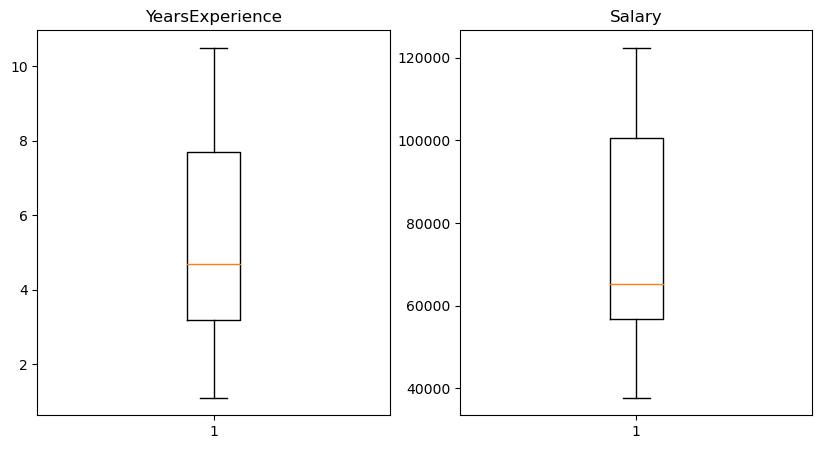

In [13]:
plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.boxplot(data['YearsExperience'])
plt.title('YearsExperience')
plt.subplot(122)
plt.boxplot(data['Salary'])
plt.title('Salary')
plt.show()

In [14]:
## no outliers
## checking the correlations btw variables

In [15]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [16]:
## correlation is good score is more than 0.8, let us visualize the correlation

<Axes: xlabel='YearsExperience', ylabel='Salary'>

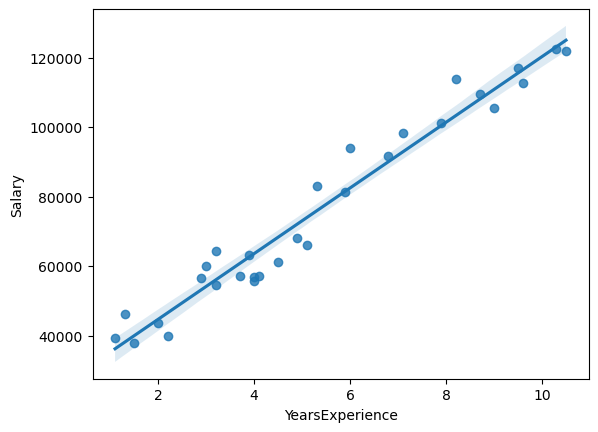

In [17]:
sb.regplot(x=data['YearsExperience'],y=data['Salary'])

In [18]:
## let us check the homoscedasticity & heteroscadasticity

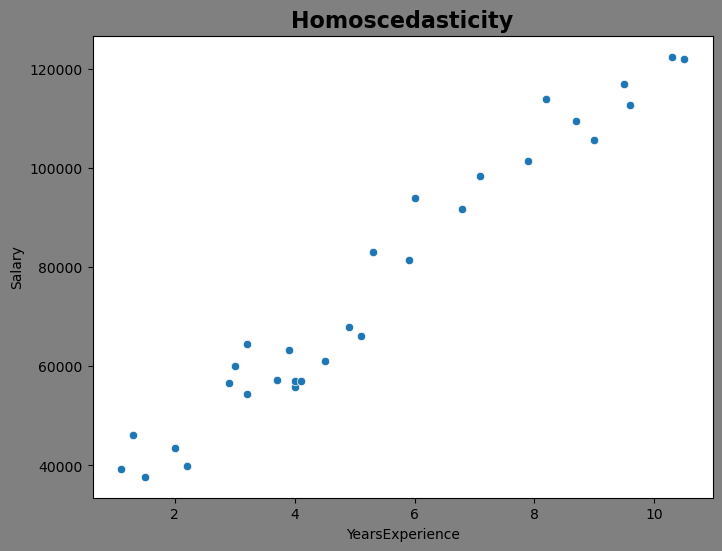

In [19]:
plt.figure(figsize = (8,6), facecolor = 'grey')
sb.scatterplot(x = data['YearsExperience'], y = data['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [20]:
##here the delivery time increases with sorting time , error is constant across the values of dependent variable ,
## hence we can  say it exhibits the homoscadasticity

In [21]:
data.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

In [22]:
##Feature Engineering
## trying different transformation to remove skewness and for a normal distributioabsn

C:\Users\Shiva\AppData\Local\Temp\ipykernel_27556\3745397962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['YearsExperience'], bins = 10, kde = True)


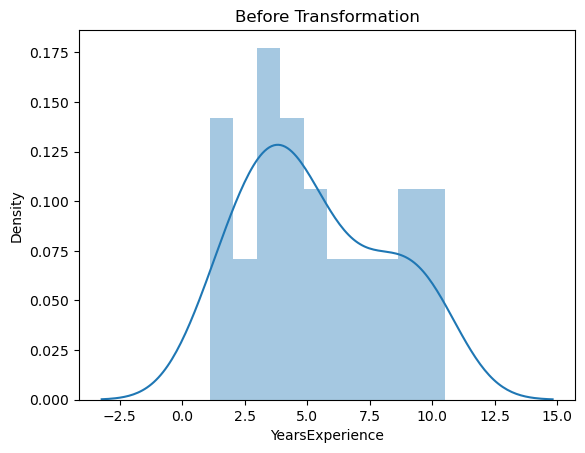

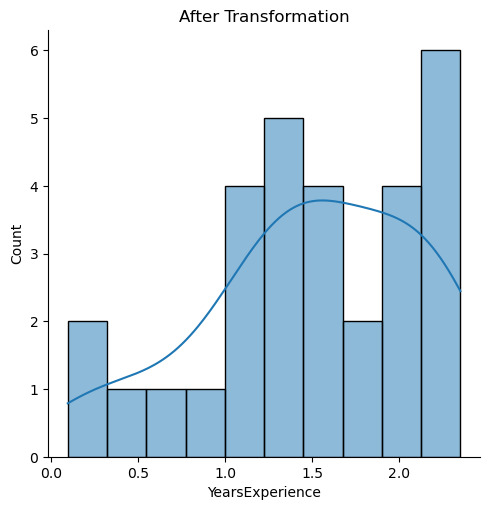

In [23]:
sb.distplot(data['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sb.displot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

C:\Users\Shiva\AppData\Local\Temp\ipykernel_27556\4087353733.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['YearsExperience'], bins = 10, kde = True)
C:\Users\Shiva\AppData\Local\Temp\ipykernel_27556\4087353733.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(data['YearsExperi

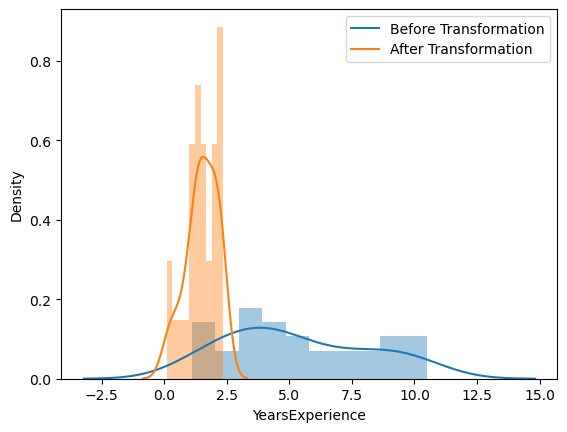

In [24]:
labels = ['Before Transformation','After Transformation']
sb.distplot(data['YearsExperience'], bins = 10, kde = True)
sb.distplot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

C:\Users\Shiva\AppData\Local\Temp\ipykernel_27556\2937766062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['YearsExperience'], bins = 10, kde = True)
C:\Users\Shiva\AppData\Local\Temp\ipykernel_27556\2937766062.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.sqrt(data['YearsExper

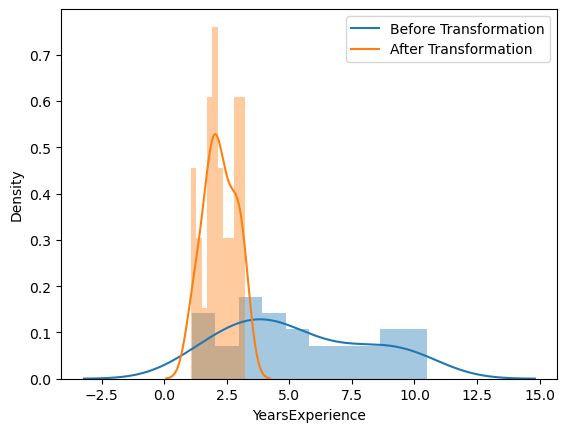

In [25]:
labels = ['Before Transformation','After Transformation']
sb.distplot(data['YearsExperience'], bins = 10, kde = True)
sb.distplot(np.sqrt(data['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

C:\Users\Shiva\AppData\Local\Temp\ipykernel_27556\2904295016.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data['YearsExperience'], bins = 10, kde = True)
C:\Users\Shiva\AppData\Local\Temp\ipykernel_27556\2904295016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.cbrt(data['YearsExper

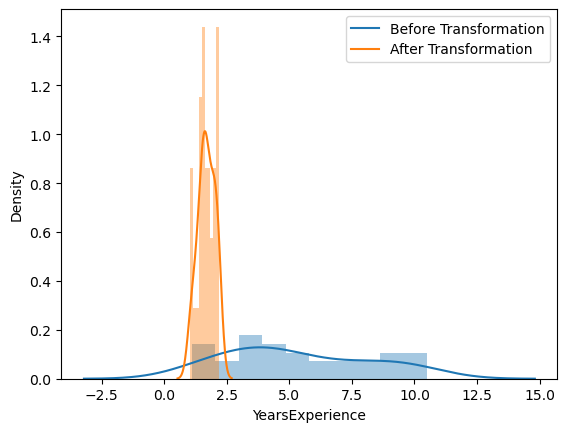

In [26]:
labels = ['Before Transformation','After Transformation']
sb.distplot(data['YearsExperience'], bins = 10, kde = True)
sb.distplot(np.cbrt(data['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

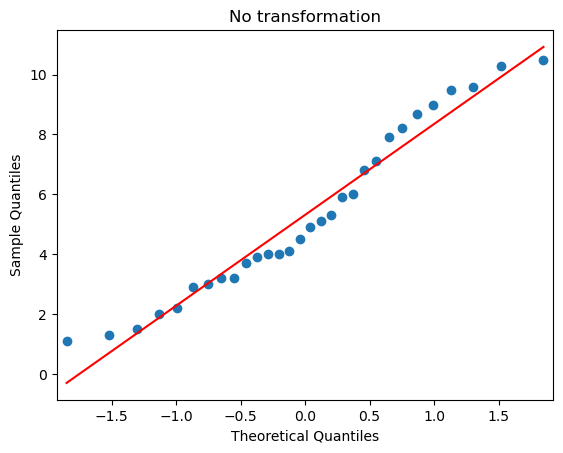

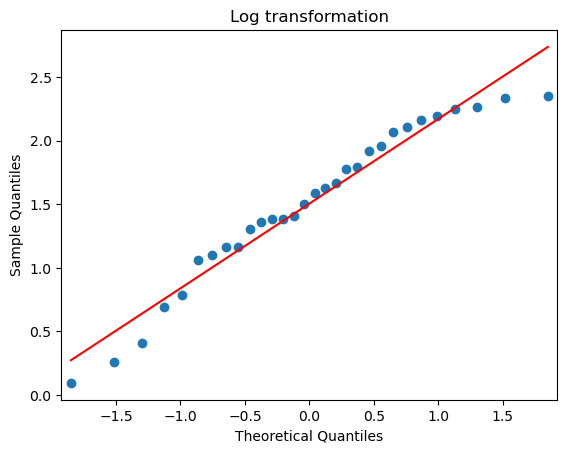

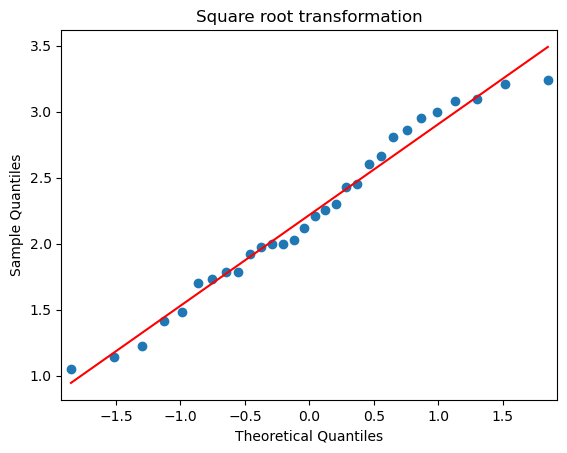

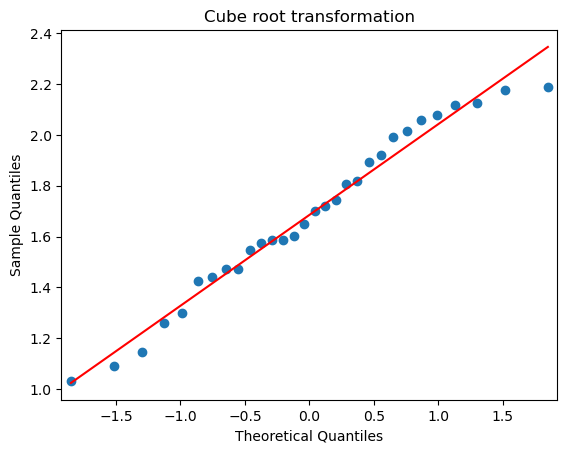

In [27]:
sm.qqplot(data['YearsExperience'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(data['YearsExperience']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(data['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()


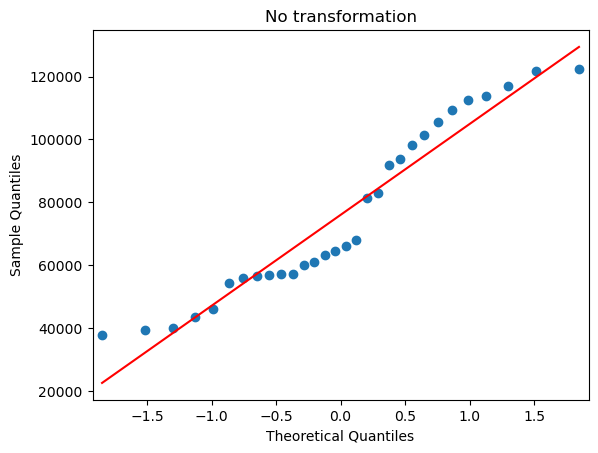

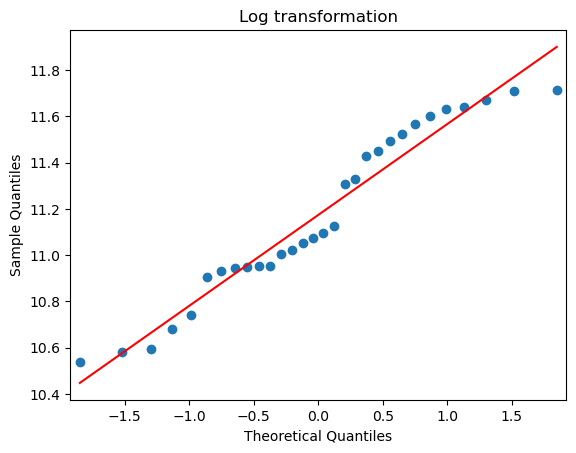

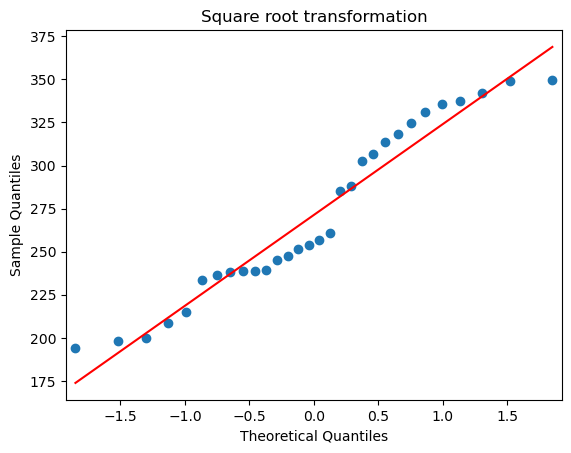

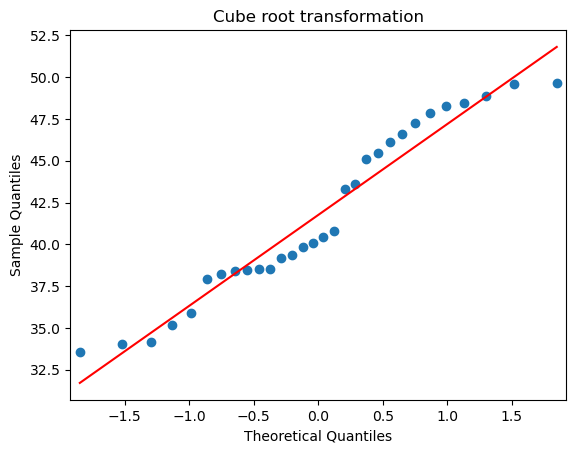

In [28]:
sm.qqplot(data['Salary'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(data['Salary']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(data['Salary']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(data['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [29]:
##Fitting Linear Regression
## using OLS

In [30]:
model=smf.ols('salary~Years_Experience',data = data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        19:44:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Years_Experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
##the model to predict well the adj rsquared & rsquared value should be more than 0.8
## here both the values are more than 0.8 hence it a good fit.
##but we can check AIC & BIC & also log likelihood values gets any better by doing the transformation 

In [32]:
model1=smf.ols('np.log(salary)~np.log(Years_Experience)',data = data1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           7.40e-16
Time:                        19:44:56   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.3280      0.056    184.868      0.000      10.214      10.442
np.log(Years_Experience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model2=smf.ols('np.sqrt(salary)~np.sqrt(Years_Experience)',data = data1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           7.58e-19
Time:                        19:44:56   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(Years_Experience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model3=smf.ols('np.cbrt(salary)~np.cbrt(Years_Experience)',data = data1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           6.37e-18
Time:                        19:44:56   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(Years_Experience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
## as we can see log transformation is giving the values closer to 0.8 compared to other transformation,
## log transformtion can be considered as a good fit.

In [36]:
##Predicting the salary hike without any transformation , because without any transformation the model was a good fit.


In [43]:
Salary_pred = pd.DataFrame()
Salary_pred['Years_Experience'] = data1.Years_Experience
Salary_pred['salary'] = data1.salary
Salary_pred['Predicted_salary_Hike'] = pd.DataFrame(model.predict(Salary_pred.Years_Experience))
Salary_pred

,Years_Experience,salary,Predicted_salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [38]:
model.params

Intercept           25792.200199
Years_Experience     9449.962321
dtype: float64

In [39]:
model.tvalues 

Intercept           11.346940
Years_Experience    24.950094
dtype: float64

In [40]:
model.pvalues

Intercept           5.511950e-12
Years_Experience    1.143068e-20
dtype: float64

In [41]:
model.rsquared

0.9569566641435086

In [42]:
model.rsquared_adj

0.9554194021486339

In [45]:
### checking the Predicted salary hike manually  for random years
manual=25792.200199+9449.962321*5.1
manual

73987.0080361